# 5 Actualmente queremos destinar dinero para igualar los mejores precios de la competencia. ¿Cuál es la cantidad total a invertir?


##### Esta pregunta se puede interpretar de distintas maneras, ya que el concepto de cuales son los mejores precios de la competencia no esta bien definido. Los mejores precios no son aquellos en los que el precio de referencia sea mas bajo ya que son valores que dependen del valor del producto en sí y no que yo esté ofertando un mejor precio. Para poder hacer una comparación objetiva voy a seguir dos pautas: 

* La primera será coger dos productos comunes que haya en los supermercados y que no den lugar a confusión a la hora de compararlos. En este caso he cogido la botella de Aquarius de 1,5 l ya que es indidudable de que este producto será el mismo en todos los supermercados y una diferencia de precio en esto sería un claro indicador del desfase en los precios.

* La segunda será escoger un próducto básico de la marca blanca de todos los supermercados.

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("raw_data.csv")

In [3]:
df_mercadona= df[df["id_reference_supermarket"]=="M1"]
df_carrefour= df[df["id_reference_supermarket"]=="M2"]
df_dia= df[df["id_reference_supermarket"]=="M3"]


In [4]:
df_carrefour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1693583 entries, 2053 to 8223981
Data columns (total 9 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   category                  object 
 1   name                      object 
 2   description               object 
 3   price                     float64
 4   reference_price           float64
 5   reference_unit            object 
 6   insert_date               object 
 7   product_id                object 
 8   id_reference_supermarket  object 
dtypes: float64(2), object(7)
memory usage: 129.2+ MB


In [5]:
df_carrefour.head(3)

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
2053,bebidas_vinos_rosado,Muga Rosado 2019,NaN,9.15,9.15,ud,2021-03-06 00:00:00,4a9bb57a9ebbad18dff028c702d70c0e,M2
2054,bebidas_vinos_blanco,Blanc Pescador Espumoso Blanco,NaN,3.99,3.99,ud,2021-03-06 00:00:00,e2edfbb48927c755131eab0016995453,M2
2055,bebidas_alcoholes_ron,Ron Brugal añejo superior 70 cl.,NaN,13.80,19.71,l,2021-03-06 00:00:00,e86bfe04af8fdab975a3ac9a86276e3f,M2


In [6]:
df_mercadona_Aquarius=df_mercadona[(df_mercadona["name"].str.contains("Aquarius")) & df_mercadona["description"].str.contains("Botella")]
df_mercadona_Aquarius.sort_values(by="insert_date",ascending=False).head(2)

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
8221179,agua_y_refrescos_isotonico_y_energetico,Bebida isotónica limón Aquarius zero azúcar,Botella,1.8,1.2,l,2022-09-15 00:00:00,e40cab6732ef095805884ebf26759890,M1
8221157,agua_y_refrescos_isotonico_y_energetico,Bebida isotónica naranja Aquarius,Botella,1.8,1.2,l,2022-09-15 00:00:00,ed6b157243bb5b81f11dccd5b5d394e9,M1


In [7]:
df_mercadona_Aquarius_gb=df_mercadona_Aquarius.groupby(by="product_id").agg({"reference_price":"mean","category":"count"})

In [8]:
df_mercadona_Aquarius_gb["reference_price"].mean()

1.1071425163983304

In [9]:
df_carrefour_Aquarius=df_carrefour[(df_carrefour["name"].str.contains("Aquarius")) & df_carrefour["name"].str.contains("botella 1,5")]
df_carrefour_Aquarius.sort_values(by="insert_date",ascending=False).head(2)

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
8211128,bebidas_refrescos_sabores_sin_gas,"Aquarius sabor naranja botella 1,5 l.",NaN,1.8,1.2,l,2022-09-15 00:00:00,3637c6aa4cb98f22e3ebf340c1e1c79f,M2
8202603,bebidas_refrescos_sabores_sin_gas,Aquarius sabor naranja zero azúcar sin caloría...,NaN,1.8,1.2,l,2022-09-14 00:00:00,2bbee0f808ad648095941a51a62f934f,M2


In [10]:
df_Aquarius_carrefour_gb=df_carrefour_Aquarius.groupby(by="product_id").agg({"reference_price":"mean","category":"count"})
df_Aquarius_carrefour_gb["reference_price"].mean()

1.087681957612939

In [11]:
df_Aquarius_dia=df_dia[(df_dia["name"].str.contains("AQUARIUS")) & df_dia["name"].str.contains("1.5")]
df_Aquarius_dia.sort_values(by="insert_date",ascending=False).head(2)

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
8221318,bebidas_bebidas_isotonicas_y_energeticas,AQUARIUS bebida refrescante de limón zero bote...,NaN,1.99,1.33,l,2022-09-15 00:00:00,4bbb8fecec62f6b9fe0791e6ce54b51f,M3
8221315,bebidas_bebidas_isotonicas_y_energeticas,AQUARIUS bebida refrescante de limón botella 1...,NaN,1.85,1.23,l,2022-09-15 00:00:00,e06ac1ef58a79f6dce7c2471bb255eb2,M3


In [12]:
df_Aquarius_dia_gb=df_Aquarius_dia.groupby(by="product_id").agg({"reference_price":"mean","category":"count"})
df_Aquarius_dia_gb["reference_price"].mean()

1.2102679050273846

In [13]:
comp_Aquarius= pd.DataFrame(
{"avg price Aquarius" : [1.1071,1.0876,1.2102]}, 
index = ["Mercadona","Carrefour","DIA"])
total = comp_Aquarius.sum(axis=1)

<BarContainer object of 3 artists>

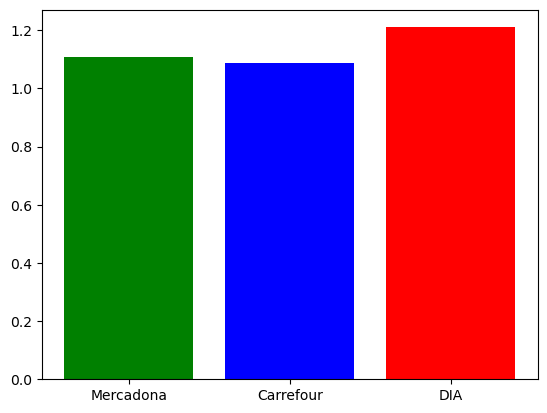

In [14]:
plt.bar(total.index,total,color=["green","blue","red"], label="avg price Aquarius")

### 1º Planteación

* Nos hemos asegurado de que para esta primera prueba solo se han seleccionado **botellas de 1,5 L de Aquarius para los tres supermercados a comparar** (Mercadona,Aquarius y Dia). Tambien se ha comprobado que en los tres casos el número de veces que se repetían los distintos productos para ese mismo formato era prácticamente el mismo y así obtener una media representativa y también que el precio de estos distintos productos para el mismo formato no difería en mucho para evitar outlayers que menoscabasen la representatividad de el estudio o como indicador de algun error al filtrar los datos.

* Como resultado tenemos que para un mismo producto la media del precio es: **Mercadona= 1.1071 Carrefour=1.0876 DIA=1.2102**. Mercadona se sitúa por debajo de DIA y por encima de Carrefour. En este caso **para alcanzar a su máximo competidor tendría que invertir mínimo un 1,86% del precio del producto** para alcanzar el precio ofertado por Carrefour. 

In [15]:
df_mercadona_marcablanca=df_mercadona[df_mercadona["name"].str.contains("Hacendado") & df_mercadona["name"].str.contains("Leche entera Hacendado") & df_mercadona["description"].str.contains("Brick")]
df_mercadona_marcablanca.sort_values(by="insert_date",ascending=False).head(2)

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
8222524,huevos_leche_y_mantequilla_leche_y_bebidas_veg...,Leche entera Hacendado,Brick,0.79,0.79,l,2022-09-15 00:00:00,a7b221ad789a19cc65b25afff807145b,M1
8210381,huevos_leche_y_mantequilla_leche_y_bebidas_veg...,Leche entera Hacendado,Brick,0.79,0.79,l,2022-09-14 00:00:00,a7b221ad789a19cc65b25afff807145b,M1


In [16]:
df_mercadona_marcablanca_gb=df_mercadona_marcablanca.groupby(by="product_id").agg({"reference_price":"mean","category":"count"})
df_mercadona_marcablanca_gb["reference_price"].mean()

0.6648561151079136

In [17]:
df_carrefour_marcablanca=df_carrefour[(df_carrefour["name"].str.contains("Leche entera Carrefour brik 1")) & df_carrefour["name"].str.contains("Leche")& df_carrefour["reference_unit"].str.contains("l")]
df_carrefour_marcablanca.sort_values(by="insert_date",ascending=False).head(2)

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
8210763,la_despensa_lacteos_leche,Leche entera Carrefour brik 1 l.,NaN,0.78,0.78,l,2022-09-15 00:00:00,f2d47e58824279ec735ff3a44fcde4f5,M2
8202188,la_despensa_lacteos_leche,Leche entera Carrefour brik 1 l.,NaN,0.78,0.78,l,2022-09-14 00:00:00,f2d47e58824279ec735ff3a44fcde4f5,M2


In [18]:
df_carrefour_marcablanca_gb=df_carrefour_marcablanca.groupby(by="product_id").agg({"reference_price":"mean","category":"count"})
df_carrefour_marcablanca_gb["reference_price"].mean()

0.65625

In [19]:
df_marcablanca_dia=df_dia[(df_dia["name"]=="DIA leche entera envase 1 lt") | (df_dia["name"]=="DIA LACTEA leche entera envase 1 lt")]
df_marcablanca_dia.sort_values(by="insert_date",ascending=False).head(2)

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
8215090,despensa_lacteos_y_huevos_leche,DIA LACTEA leche entera envase 1 lt,NaN,0.85,0.85,l,2022-09-15 00:00:00,cdc0819d53ae6bfeac6170814aced501,M3
8210227,despensa_lacteos_y_huevos_leche,DIA LACTEA leche entera envase 1 lt,NaN,0.85,0.85,l,2022-09-14 00:00:00,cdc0819d53ae6bfeac6170814aced501,M3


In [20]:
df_marcablanca_dia_gb=df_marcablanca_dia.groupby(by="product_id").agg({"reference_price":"mean","category":"count"})
df_marcablanca_dia_gb["reference_price"].mean()

0.6702893309222423

In [21]:
comp_Leche_marcablanca= pd.DataFrame(
{"avg price Leche" : [0.6648,0.6562,0.6703]}, 
index = ["Mercadona","Carrefour","DIA"])
total = comp_Leche_marcablanca.sum(axis=1)

<BarContainer object of 3 artists>

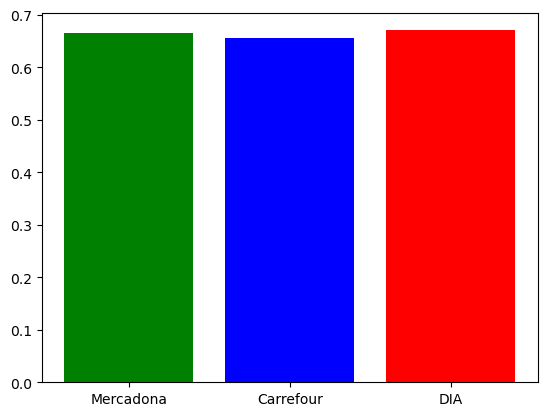

In [22]:
plt.bar(total.index,total,color=["green","blue","red"], label="avg price Aquarius")

### 2º Planteación

* Nos hemos asegurado de que para esta segunda prueba solo se han seleccionado **bricks de 1L de Leche entera de la marca blanca correspondiente para los tres supermercados** a comparar (Mercadona,Aquarius y Dia). Tambien se ha comprobado que en los tres casos el número de veces que se repetían el mismo producto era muy parecido, entorno a 540 veces. También hemos comprobado que la fecha en la que se inserta esos productos son prácticamente idénticas ya que el precio del producto sube a medida que la fecha es mas reciente debido a la inflacción. 

* Como resultado tenemos que para un mismo producto la media del precio es: **Mercadona= 0.6648 Carrefour=0.6562 DIA=0.6703**. Mercadona se sitúa por debajo de DIA y por encima de Carrefour. En este caso **para alcanzar a su máximo competidor tendría que invertir mínimo un 1,30% del precio del producto** para alcanzar el precio ofertado por Carrefour.

# Respuesta PREGUNTA 5

### Justificación 

* Para comparar de una manera objetiva como ha afectado la inflacción a las distintas cadenas de supermercados se han escogido dos ejemplos representativos, 1 sobre un producto y formato común que se encuentra en los tres supermercados y el cual distribuidor es ajeno a los tres competidores a comparar, y otro sobre un producto y formato común pero que cada uno fabrica y distribuye de manera independiente.

* Para la comparación de los precios de estos dos productos se ha tenido en cuenta el número de veces que aparecía repetido este producto y la fecha de insercción. En este caso la fecha de inserción es muy importante ya que la diferencia de precios entre la primera fecha y la última es muy grande a medida que avanza el tiempo. En este caso como la máxima fecha y la mínima fecha son iguales en los datasets de los tres supermercados y el número de veces que se repiten los productos son muy similares en los dos productos,se ha escogido la media para ver como han afrontado la inflación a lo largo de este periodo de súbida los tres supermercados. A parte se ofrecerá el dato de la diferencia del último registro para ambos productos.

* Se intento comparar categorías completas para obtener otro punto de vista, en este caso, la carne de vacuno y la cerveza sin alcohol eran dos categorias que venían definidas prácticamente igual en los tres supermercados. Pero al analizar los datos estadísticos y mas en profundidad los datos de estas categorías en concreto, se llegó a la conclusión de que aunque fueran categorías parejas, la disparidad de los distintos productos dentro de estas categorías, ya fuese en calidad, formato y cantidad, hacía que una comparación no fuese objetiva, dando resultados dispares y que no reflejaban con precisión la diferencia de precios entre supermercados. Por ello la comparación de un producto exactamente igual con otro es la forma mas fidedigna de representar esta diferencia de precios



### Respuesta

* Como resultado tenemos que para la botella de Aquarius de 1,5l el precio es: **Mercadona= 1.1071 Carrefour=1.0876 DIA=1.2102**. Mercadona se sitúa por debajo de DIA y por encima de Carrefour. En este caso **para alcanzar a su máximo competidor tendría que invertir mínimo un 1,86% del precio del producto** para alcanzar el precio ofertado por Carrefour.En caso de cojamos la última fecha de inserción sería **Mercadona= 1.20 Carrefour=1.20 DIA=1.33** 

* Como resultado tenemos que para el brick de Leche entera marca blanca de 1l el precio es: **Mercadona= 0.6648 Carrefour=0.6562 DIA=0.6703**. Mercadona se sitúa por debajo de DIA y por encima de Carrefour. En este caso **para alcanzar a su máximo competidor tendría que invertir mínimo un 1,30% del precio del producto** para alcanzar el precio ofertado por Carrefour. En caso de cojamos la última fecha de inserción sería **Mercadona= 0.79 Carrefour=0.78 DIA=0.85**. Por lo que si cogemos este último precio como referencia **para alcanzar a su máximo competidor tendría que invertir mínimo un 1,27% del precio del producto**.